##### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - MÉTRICAS

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

- Calculad las métricas para vuestro modelo
- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [2]:
df = pd.read_pickle("../datos/df_estan_cod.pkl")
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,...,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,0,1,1.041667,0,2,-1.400844,0,0,2,...,2,3,3,4,0,3,1,4,4,0.000000
1,0,1,1,0.291667,0,1,0.454852,0,0,4,...,3,3,3,2,1,2,3,4,4,25.833333
2,0,0,1,-1.041667,0,2,0.179747,0,0,4,...,0,3,3,4,2,2,2,2,4,0.000000
3,0,0,1,0.833333,0,2,-1.098734,0,0,4,...,2,3,3,3,0,0,2,3,2,0.000000
4,0,0,1,1.250000,0,2,-1.325738,0,0,4,...,3,2,3,3,0,0,2,3,1,0.000000


In [3]:
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [4]:
X1.head(2)

,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,1,1.041667,0,2,-1.400844,0,0,2,2,2,3,3,4,0,3,1,4,4,0.000000
1,1,1,0.291667,0,1,0.454852,0,0,4,0,3,3,3,2,1,2,3,4,4,25.833333


In [5]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: satisfaction, dtype: int64

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [7]:
# definimos la regresión logistica
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

## MÉTRICAS

### MATRIZ DE CONFUSIÓN

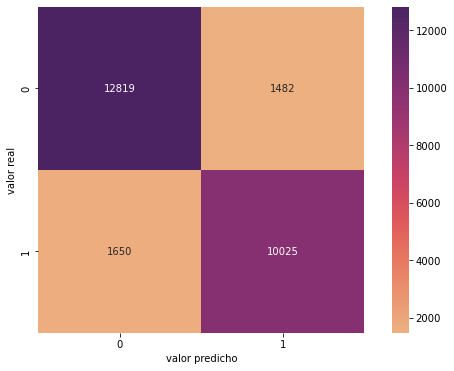

In [8]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (10, 6))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "flare")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [9]:
# Vamos a sacar las métricas de la regresión logística y para ello usamos esta función

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [10]:
resultado_logistica = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión Logística")
resultado_logistica

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.879427,0.871209,0.858672,0.864895,0.756042,test,Regresión Logística
1,0.878157,0.868882,0.861284,0.865067,0.754002,train,Regresión Logística


Si observamos los datos:

- kappa: es de 0.75, lo que el acierto en las predicciones tanto positivas como negativas de nuestro modelo es alto y no predice y acierta por azar.

- accuracy: es de 0.87, lo que quiere decir que nuestro modelo acierta un 87% de las veces.

- precision: hay un 0.86 (test) y un 0.87 (train). Esta métrica indica el porcentaje de predicciones positivas que fueron correctas. En nuestro caso queremos equivocarnos menos en los FN, es decir, las personas que nuestro modelo predijo como 'satisfechas' pero que en realidad no lo estaban, por lo que nos centraremos en esta métrica.

- recall: es de 0.85 (test) y de 0.86 (train). Es decir, el porcentaje de casos positivos capturados. 

- f1: 0.86 en ambos (train y test). Esta métrica refleja la media armónica, nuestro modelo es bastante parsimonioso.

Las métricas obtenidas no parecen malas, al contrario, nuestro modelo parece bastante bueno. No obstante, viendo que los resultados del test son ligerísimamente mejores (en recall), podríamos intuir algo de underfitting. 

In [11]:
df.to_csv('../datos/resultados_log.csv')

In [12]:
df.to_pickle('../datos/df_resultados_log.pkl')

In [13]:
resultado_logistica.to_pickle('../datos/resultados_log.pkl')